# Machine Learning

Código adaptado de: https://github.com/devmedeiros/credit-score-classification-app

Autor original: Jaqueline Medeiros

Licença: MIT License

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/processed/credit-score.csv', index_col=['ID', 'Customer_ID'])

## Feature Selection

I'll be dropping all the features that I won't be using.

In [3]:
df.drop(columns=['Occupation', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Type_of_Loan', 'Delay_from_due_date',
                 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Amount_invested_monthly',
                 'Monthly_Balance', 'Num_of_Loan', 'Outstanding_Debt', 'Not_Specified', 'Month'], inplace=True)
df.head()

,,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Auto_Loan,Credit-Builder_Loan,Personal_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Missed_Payment_Day
ID,Customer_ID,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,23.0,19114.12,3.0,4.0,7.0,26.822620,No,49.574949,1,265.0,1,1,1,1,0,0,0,0,1
0x1603,CUS_0xd40,23.0,19114.12,3.0,4.0,6.0,31.944960,No,49.574949,1,266.0,1,1,1,1,0,0,0,0,0
0x1604,CUS_0xd40,23.0,19114.12,3.0,4.0,7.0,28.609352,No,49.574949,1,267.0,1,1,1,1,0,0,0,0,1
0x1605,CUS_0xd40,23.0,19114.12,3.0,4.0,4.0,31.377862,No,49.574949,1,268.0,1,1,1,1,0,0,0,0,1
0x1606,CUS_0xd40,23.0,19114.12,3.0,4.0,6.0,24.797347,No,49.574949,1,269.0,1,1,1,1,0,0,0,0,1


## Making Dummies

In [4]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score,Credit_History_Age_Formated,Auto_Loan,Credit-Builder_Loan,Personal_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Missed_Payment_Day,Payment_of_Min_Amount_Yes
ID,Customer_ID,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,23.0,19114.12,3.0,4.0,7.0,26.822620,49.574949,1,265.0,1,1,1,1,0,0,0,0,1,False
0x1603,CUS_0xd40,23.0,19114.12,3.0,4.0,6.0,31.944960,49.574949,1,266.0,1,1,1,1,0,0,0,0,0,False
0x1604,CUS_0xd40,23.0,19114.12,3.0,4.0,7.0,28.609352,49.574949,1,267.0,1,1,1,1,0,0,0,0,1,False
0x1605,CUS_0xd40,23.0,19114.12,3.0,4.0,4.0,31.377862,49.574949,1,268.0,1,1,1,1,0,0,0,0,1,False
0x1606,CUS_0xd40,23.0,19114.12,3.0,4.0,6.0,24.797347,49.574949,1,269.0,1,1,1,1,0,0,0,0,1,False


## Min Max Scaling

I'm scaling the numeric values to minimize the bias because of the diverse data.

In [5]:
y = df.Credit_Score
x = df.drop(columns='Credit_Score')

/tmp/ipykernel_50500/3296664848.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  x.loc[:,:] = scaled_values


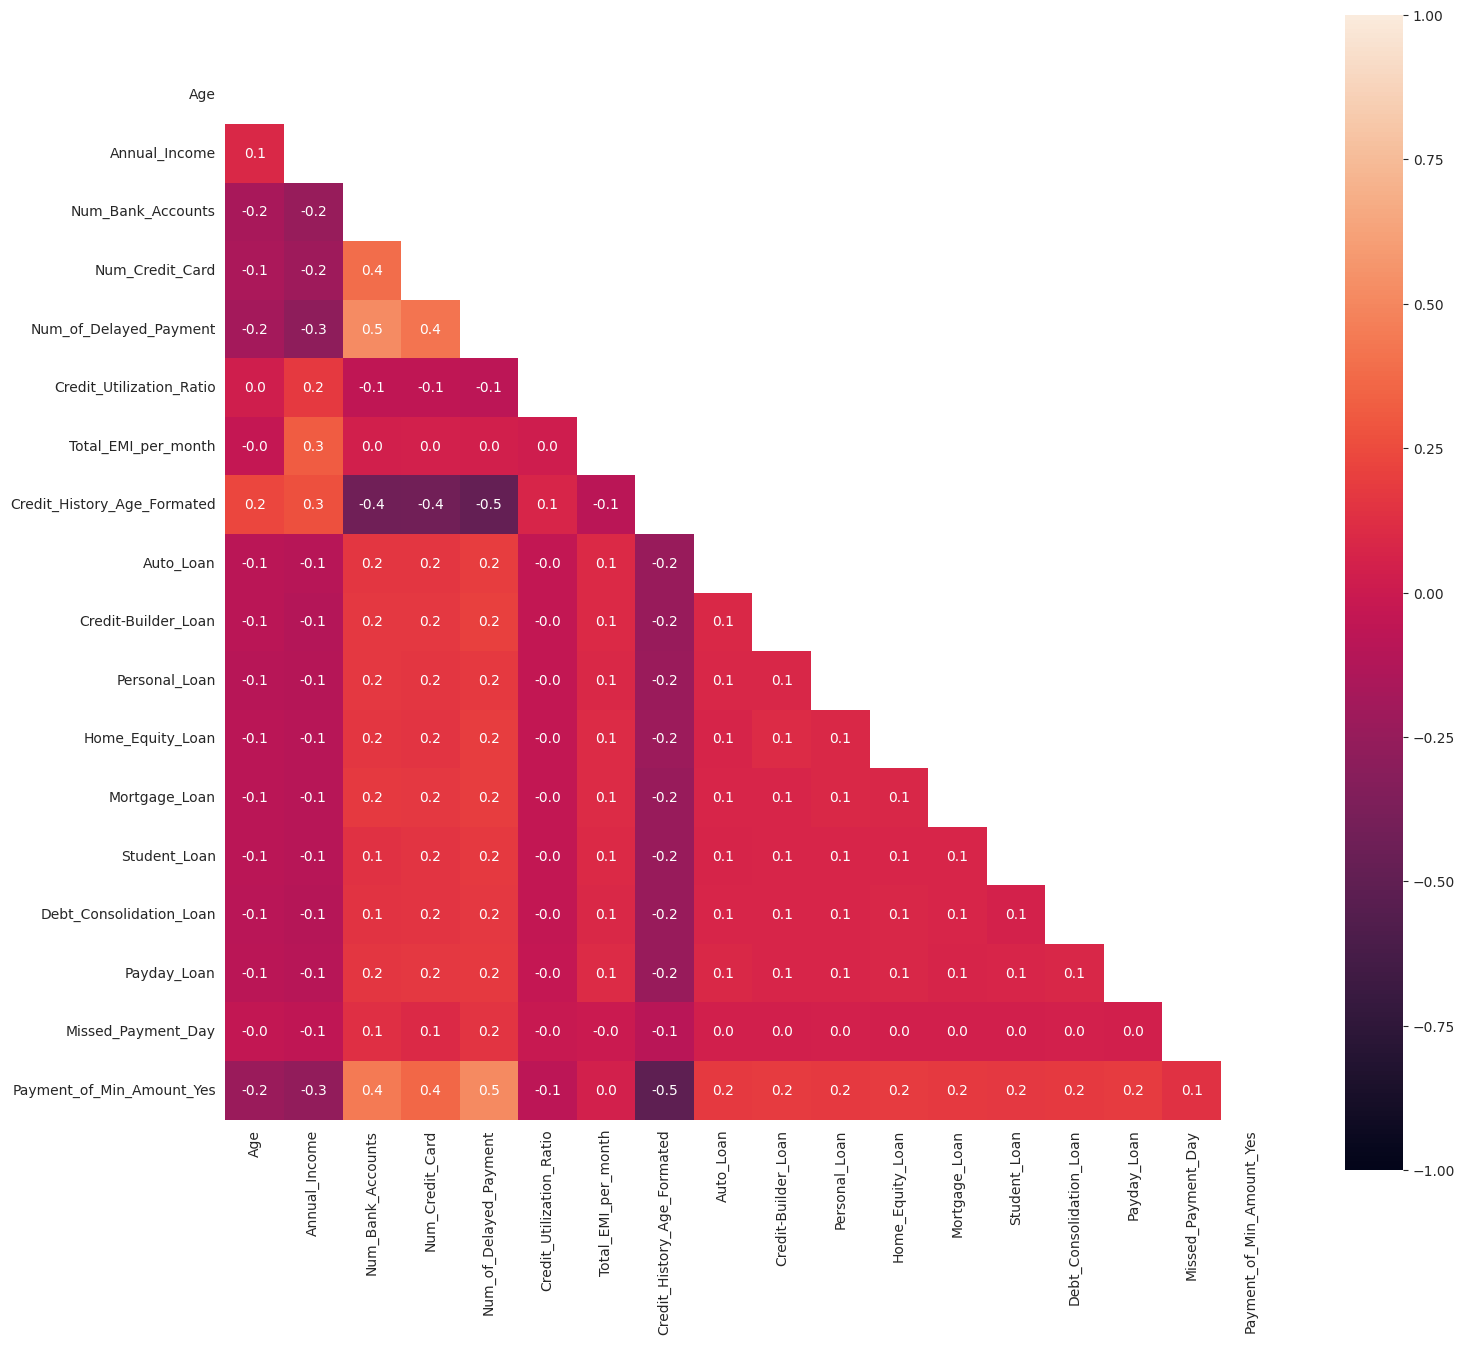

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x) 
scaled_values = scaler.transform(x)
x.loc[:,:] = scaled_values

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = x.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(17, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, fmt = '.1f', vmin=-1, vmax=1)

I plotted the correlation matrix to be sure that no feature is heavily correlated with each other.

# Splitting Train and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from random import shuffle

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, stratify=y, random_state=43)

# Training the Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = RandomForestClassifier(random_state=43)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
labels = np.unique(y_test)
conf = confusion_matrix(y_test, prediction)
conf_p = conf/sum(conf)
conf = pd.DataFrame(conf, index=labels, columns=labels)
conf_p = pd.DataFrame(conf_p, index=labels, columns=labels)

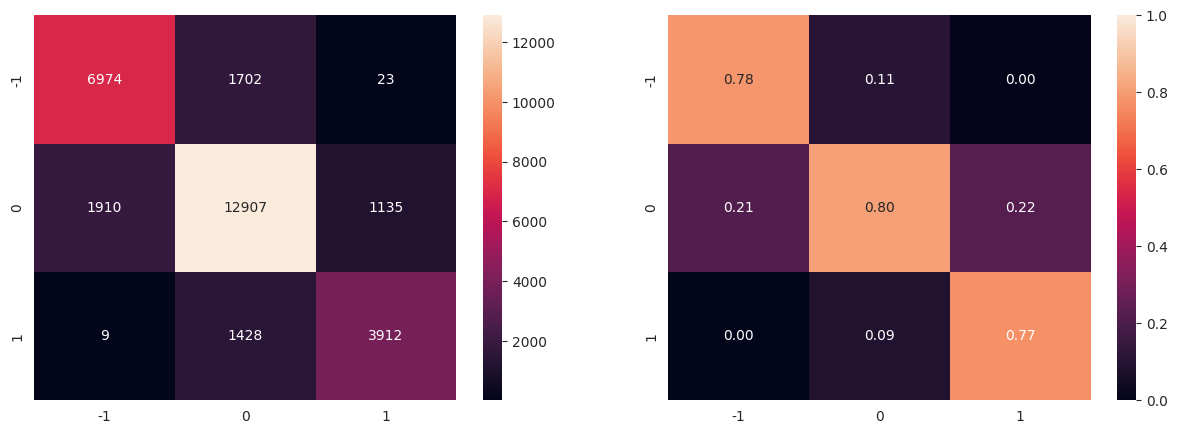

In [13]:
with sns.axes_style('white'):
    fig, ax =plt.subplots(1,2, figsize=(15, 5))
    sns.heatmap(conf, annot = True, fmt = '.0f',  ax=ax[0])
    sns.heatmap(conf_p, annot = True, fmt = '.2f', vmin=0, vmax=1,  ax=ax[1])

The dataset is imbalanced and even though I didn't address it, the imbalance didn't seem to have a big impact on the model's predictive capacity.

# Saving the Model

In [14]:
import pickle

I'm saving the model and the scaler to use in the streamlit app.

In [15]:
pickle.dump(model, open('../models/model.obj', 'wb'))

In [16]:
pickle.dump(scaler, open('../models/scaler.obj', 'wb'))